In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [37]:
df = pd.read_csv('50_Startups.csv')
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [40]:
# one-hot-encoding
df1 = pd.get_dummies(df).drop(['State_Florida'],axis=1)
df1.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0


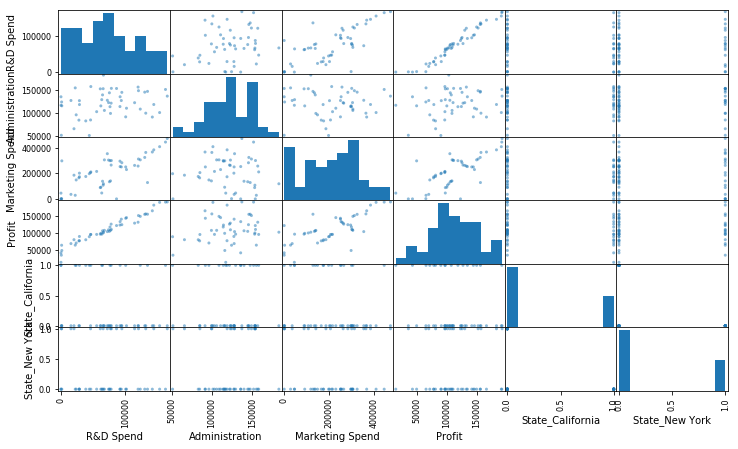

In [41]:
scatter_matrix(df1, figsize=(12,7))
None

In [42]:
df1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.515152
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,1.000000


In [43]:
# turns out we don't need the state, it's not a good predictor of profit
y = df1.Profit
X = df1.drop(['Profit', 'State_California', 'State_New York'],axis=1)

# the y-intercept doesn't make sense here
#X = sm.add_constant(X)
y.head(1)

0    192261.83
Name: Profit, dtype: float64

In [44]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1232.
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           1.17e-44
Time:                        16:33:35   Log-Likelihood:                -545.82
No. Observations:                  50   AIC:                             1098.
Df Residuals:                      47   BIC:                             1103.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7180      0.065     11.047      0.000       0.587       0.849
Administration      0.3277      0.031     10.458      0.000       0.265       0.391
Marketing Spend     0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'studentized residuals')

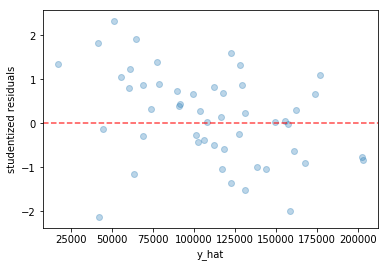

In [45]:
# plot studentized residuals
st_res = results.outlier_test()['student_resid']
yhat = results.fittedvalues
plt.scatter(yhat, st_res, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('y_hat')
plt.ylabel('studentized residuals')

Figure(432x288)


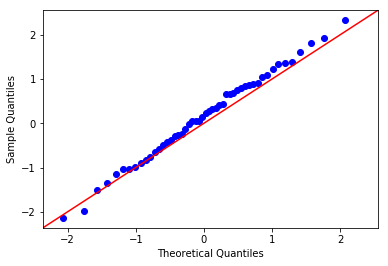

In [46]:
# qq plot
print(qqplot(st_res, line='45', fit=False))